In [1]:

import sys
!{sys.executable} -m pip install tradingeconomics
import pandas as pd
import requests
from pprint import pprint
import numpy as np
import tradingeconomics as te
import matplotlib.pyplot as plt
from scipy import stats




twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
te.login()

'You are logged in as a guest:guest'

In [3]:
#retrieve cpi data
te.getHistoricalData(country='canada', indicator='cpi', initDate='1946-01-01')

https://api.tradingeconomics.com/historical/country/canada/indicator/cpi/1946-01-01?c=guest:guest


,0
2008-12-31,1549.13
2009-12-31,1371.15
2010-12-31,1613.46
2011-12-31,1788.65
2012-12-31,1824.29
2013-12-31,1842.63
2014-12-31,1799.27
2015-12-31,1559.62
2016-12-31,1535.77
2017-12-31,1653.04


In [4]:
#create dataframe
cpi_data = pd.DataFrame({"Date": ["2008", "2009", "2010", "2011", "2012", "2013", "2014"],
                         "CPI": [1549.13, 1371.15, 1613.46, 1788.65, 1824.29, 1842.63, 1799.27]
                        })
cpi_data


,Date,CPI
0,2008,1549.13
1,2009,1371.15
2,2010,1613.46
3,2011,1788.65
4,2012,1824.29
5,2013,1842.63
6,2014,1799.27


In [5]:
#To retrieve net migration data
migration_data = pd.read_csv('newnationalmigration_clean.csv')
migration_data = migration_data[(migration_data['Date'] >= 2008) & (migration_data['Date'] <= 2014)]
migration_data

,Date,National Net Migration
62,2008,272667
63,2009,272256
64,2010,255423
65,2011,250434
66,2012,263090
67,2013,269806
68,2014,241145


[Text(0,0.5,'Net National Migration'),
 Text(0.5,0,'CPI'),
 Text(0.5,1,'Net National Migration and CPI')]

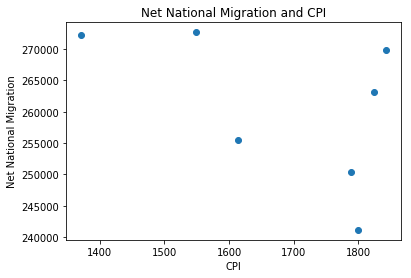

In [16]:
#Plot graph (Net Migration vs. CPI)
fig, axes = plt.subplots()
axes.scatter(cpi_data['CPI'], migration_data['National Net Migration'])
axes.set(title = 'Net National Migration and CPI', xlabel  = 'CPI', ylabel = 'Net National Migration')


In [20]:
migration_slope, migration_int,migration_r, migration_p, migration_std_err = stats.linregress(
    cpi_data['CPI'], migration_data['National Net Migration'])
migration_fit = migration_slope * cpi_data['CPI'] + migration_int

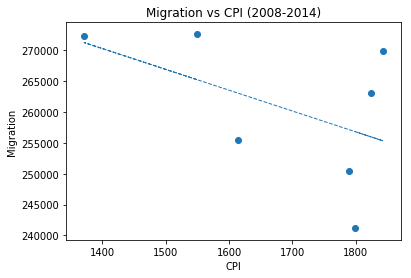

-0.4949436889730689
0.2587735030882783
26.452716948893766


In [21]:
#To plot graph
plt.plot(cpi_data['CPI'], migration_fit, linestyle= "--", linewidth=1)
plt.scatter(cpi_data['CPI'], migration_data['National Net Migration'])

plt.title("Migration vs CPI (2008-2014)")
plt.xlabel("CPI")
plt.ylabel("Migration")
plt.savefig("Migration vs CPI.png")
plt.show()

print(migration_r)
print(migration_p)
print(migration_std_err)